# Practical Python – Error Handling,Logging, and Data Manipulation Assignment
---

## 1. What is the difference between Multithreading and Multiprocessing?

### Ans:**Key Differences**

| **Basis**         | **Multithreading**                 | **Multiprocessing**     |
| ----------------- | ---------------------------------- | ----------------------- |
| Memory            | Shared memory                      | Separate memory         |
| Execution         | Concurrent (not true parallelism)  | True parallel execution |
| Best for          | I/O-bound tasks                    | CPU-bound tasks         |
| Failure Impact    | One thread crash can affect others | Independent processes   |
| Library in Python | `threading`                        | `multiprocessing`       |

### **Conclusion**

**Multithreading** is efficient for tasks that involve waiting (like input/output), while **Multiprocessing** is better for tasks that require high computation.
Choosing between them depends on the **type of workload** and the need for **speed vs. memory efficiency**.

---

## 2.What are the challenges associated with memory management in python?

### Ans:**Challenges Associated with Memory Management in Python:**

1. **Automatic Garbage Collection Limitations**

   * Python uses reference counting and a garbage collector for cyclic references.
   * **Problem:** Large cycles or unreferenced objects may still temporarily occupy memory before collection.

2. **Memory Leaks in Long-Running Programs**

   * Objects unintentionally referenced (e.g., global lists, caches) prevent garbage collection.
   * Hard to detect in Python because it manages memory automatically.

3. **High Memory Overhead**

   * Python objects (like integers, lists, dicts) consume more memory than their raw data due to object metadata.
   * Example: `int` object has extra bytes for type info, reference count, etc.

4. **Fragmentation**

   * Frequent allocation and deallocation of different-sized objects can fragment memory.
   * Leads to inefficient memory usage, especially in large applications.

5. **Handling Large Data**

   * Python may struggle with very large datasets (e.g., big NumPy arrays or Pandas DataFrames) due to limited memory.
   * Requires careful management or using specialized libraries.

6. **Circular References**

   * Objects referencing each other can prevent automatic deallocation unless garbage collector identifies cycles.

---

## 3.Write a Python program that logs an error message to a log file when a division by zero exception occurs.

In [3]:
import logging

# Configure logging
logging.basicConfig(filename="error_log.txt", level=logging.ERROR,
                    format="%(asctime)s - %(levelname)s - %(message)s")

try:
    # Input from user
    num1 = int(input("Enter numerator: "))
    num2 = int(input("Enter denominator: "))
    
    # Division operation
    result = num1 / num2
    print("Result =", result)

except ZeroDivisionError as e:
    print("Error: Division by zero is not allowed.")
    logging.error("Division by zero occurred: %s", e)

finally:
    print("Program executed successfully.")

Enter numerator:  8
Enter denominator:  2


Result = 4.0
Program executed successfully.


In [ ]:
### Division by zero

Enter numerator: 5
Enter denominator: 0
Error: Division by zero is not allowed.
Program executed successfully.


### log file(error_log.text)content:

In [ ]:
2025-10-11 22:10:15,345 - ERROR - Division by zero occurred: division by zero


## 4.Write a Python program that reads from one file and writes its content to another file.

In [2]:
# Step 1: Create a source file and write some text
with open("source.txt", "w") as f:
    f.write("Hello Khushi!\nThis is the content of the source file.\nCopied successfully using Python.")

# Step 2: Read from source and write to destination
with open("source.txt", "r") as src, open("destination.txt", "w") as dest:
    content = src.read()
    dest.write(content)

# Step 3: Display result
print("File copied successfully!\n")
print("Content of destination.txt:\n")
with open("destination.txt", "r") as f:
    print(f.read())


File copied successfully!

Content of destination.txt:

Hello Khushi!
This is the content of the source file.
Copied successfully using Python.


## 5.Write a program that handles both IndexError and KeyError using a try-except block.

In [1]:
# Program to handle both IndexError and KeyError using try-except

try:
    my_list = [100, 150, 300]
    my_dict = {"a": 5, "b": 10}

    # Intentionally causing both errors
    print(my_list[5])        # This will raise IndexError
    print(my_dict["z"])      # This will raise KeyError

except IndexError:
    print("IndexError occurred: List index out of range.")

except KeyError:
    print("KeyError occurred: Key not found in dictionary.")

finally:
    print("Program executed successfully.")


IndexError occurred: List index out of range.
Program executed successfully.


---

## 6.What are the differences between NumPy arrays and Python lists?

### Ans:**Differences between NumPy Arrays and Python Lists**

| Feature                | Python List                                               | NumPy Array                                                  |
| ---------------------- | --------------------------------------------------------- | ------------------------------------------------------------ |
| **Homogeneity**        | Can store mixed data types                                | Stores elements of **same data type** only                   |
| **Memory Usage**       | Higher, more overhead per element                         | Lower, more **memory-efficient**                             |
| **Performance**        | Slower for numerical operations                           | **Faster**, optimized C backend for vectorized operations    |
| **Operations**         | No built-in vectorized operations; need loops             | Supports **vectorized operations** (element-wise arithmetic) |
| **Dimensionality**     | Can be nested lists, but not true multidimensional arrays | True **n-dimensional arrays**                                |
| **Slicing & Indexing** | Basic slicing, can be tricky with nested lists            | Advanced slicing, boolean indexing, fancy indexing           |
| **Functionality**      | Limited built-in math functions                           | Rich **mathematical and statistical functions**              |
| **Mutability**         | Mutable (elements can be changed)                         | Mutable, but size fixed; can change values                   |

---


## 7.Explain the difference between apply() and map() in Pandas.

### Ans:**Difference between `apply()` and `map()` in Pandas-

| Feature           | `map()`                                    | `apply()`                                                               |
| ----------------- | ------------------------------------------ | ----------------------------------------------------------------------- |
| **Applicable To** | Pandas **Series**                          | Pandas **Series** & **DataFrame**                                       |
| **Functionality** | Element-wise transformation                | Can apply **any function** row-wise, column-wise, or element-wise       |
| **Input**         | Single function or dict/Series for mapping | Any function (Python function, lambda, NumPy function, etc.)            |
| **Output**        | Returns a **Series**                       | Returns **Series** (for Series) or **DataFrame/Series** (for DataFrame) |
| **Use Case**      | Simple element-wise operations             | Complex operations involving multiple columns or rows                   |
| **Flexibility**   | Less flexible, mostly 1D                   | More flexible, works across dimensions                                  |
| **Example**       | `df['col'].map(lambda x: x*2)`             | `df.apply(lambda row: row['A']+row['B'], axis=1)`                       |


---

## 8.Create a histogram using Seaborn to visualize a distribution.

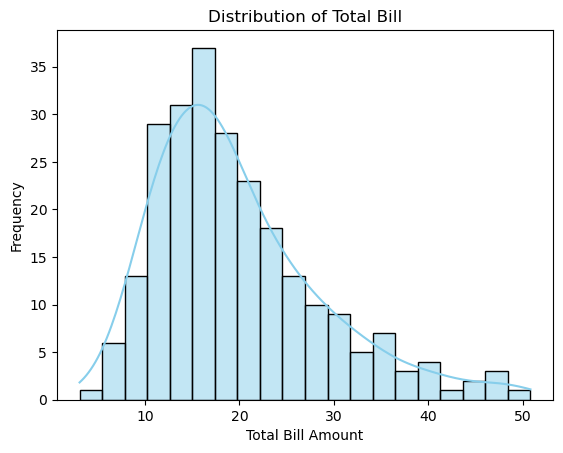

In [4]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset
data = sns.load_dataset("tips")   # built-in dataset

# Create a histogram of 'total_bill' column
sns.histplot(data['total_bill'], bins=20, kde=True, color='skyblue')

# Add title and labels
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill Amount")
plt.ylabel("Frequency")

# Display the plot
plt.show()


---
## 9.Use Pandas to load a CSV file and display its first 5 rows.

In [4]:
import pandas as pd

# Step 1: Create a sample CSV file (so no error)
data = {
    "Name": ["Vickky", "Rohit", "Shivanshu", "Rishabh", "Priyanshu"],
    "Age": [28, 25, 23, 21, 18],
    "City": ["Noida", "Delhi", "Kolkata", "Chennai", "Hyderabad"]
}

# Convert dictionary to DataFrame
df_sample = pd.DataFrame(data)

# Save as CSV
df_sample.to_csv("sample.csv", index=False)

# Step 2: Load the CSV file
df = pd.read_csv("sample.csv")

# Step 3: Display first 5 rows
df.head()


,Name,Age,City
0,Vickky,28,Noida
1,Rohit,25,Delhi
2,Shivanshu,23,Kolkata
3,Rishabh,21,Chennai
4,Priyanshu,18,Hyderabad


---
## 10.: Calculate the correlation matrix using Seaborn and visualize it with a heatmap.

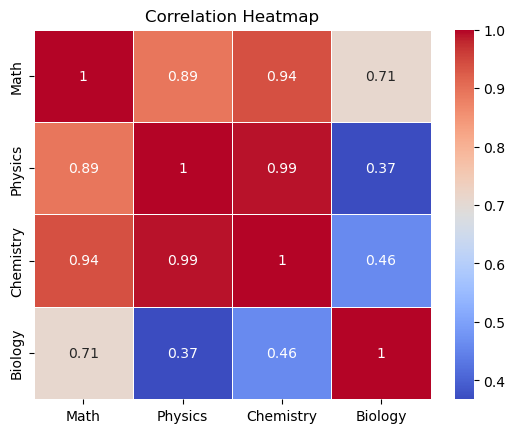

In [6]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Create sample data
data = {
    "Math": [95, 80, 70, 85, 97],
    "Physics": [85, 79, 75, 82, 96],
    "Chemistry": [85, 78, 72, 80, 94],
    "Biology": [90, 81, 68, 88, 80]
}

df = pd.DataFrame(data)

# Step 3: Calculate correlation matrix
corr_matrix = df.corr()

# Step 4: Visualize correlation matrix with heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
